<a href="https://colab.research.google.com/github/AngelAlanis/cienciadatosorg/blob/main/CASO_Analizar_visualiza_diagramas_dispersi%C3%B3n_e_interpretar_datos_correlcionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASO. Analizar, visualiza diagramas dispersión e interpretar datos correlcionados

Construir, compartir e interpretar el CASO. Analizar, visualizar diagramas dispersión e interpretar datos correlacionados bivariados y mutivariados.

In [10]:
#Cargar librerias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# Para el modelo de regresión
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics # Para determinar métricas.

# Para determinar estadísticos ...
import statsmodels.api as sm

In [11]:
#Crear funciones
def f_ver_temperaturas (fechas, temperaturas):
    # Crear un DataFrame con las fechas y temperaturas
    df = pd.DataFrame({'fecha': fechas, 'temperatura': temperaturas})

    # Asegurarse de que 'fecha' es un tipo datetime
    df['fecha'] = pd.to_datetime(df['fecha'])

    # Establecer 'fecha' como el índice del DataFrame
    df.set_index('fecha', inplace=True)

    # Agrupar por mes y año, y calcular la temperatura promedio
    df_resampled = df.resample('M').mean()

    # Crear la visualización
    plt.figure(figsize=(12, 6))
    plt.plot(df_resampled.index, df_resampled['temperatura'], marker='o', linestyle='-', color='b')
    plt.title('Temperatura promedio diario mensual por Año')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura Promedio (°C)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def f_matriz_correlacion_variables(datos):
  # Calcular la matriz de correlación
  corr_matrix = datos.corr()

  # Visualizar la matriz de correlación
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, fmt=".2f")
  plt.show()

# Esta función regresa los valores de los Coeficientes
# El intercept_0 es el coeficiene de intersección y el resto
# son los 8 coeficiene de las 8 variables predictoras del 0 al 7 por ser un arreglo
def f_coeficientes_modelo (modelo):
  return modelo.intercept_, modelo.coef_[0], modelo.coef_[1], modelo.coef_[2], modelo.coef_[3], modelo.coef_[4], modelo.coef_[5], modelo.coef_[6], modelo.coef_[7]

In [12]:
# Crear un widget de salida
visualizar = widgets.Output()


# Función para actualizar y mostrar el contenido dinámicamente en el widget de salida
def f_visualizar_datos(datos1, datos2, titulo1, titulo2):
    with visualizar:
        #global titulo1, titulo2
        #titulo1 = "Primeros 20 registros de datos"
        visualizar.clear_output(wait=True)  # Limpiar el contenido anterior
        display(HTML(f"<h2>{titulo1}</h2>"))  # Establecer el nuevo título
        # Visualizar datos
        display(datos1)

        #titulo2 = "Últimos 20 registros de datos"
        display(HTML(f"<h2>{titulo2}</h2>"))  # Establecer el nuevo título
        # Visualizar datos
        display(datos2)

In [13]:
#Cargar datos
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2023/datos/SolarPrediction.csv")

# Llamar a la función para mostrar datos de entrenamiento ordenados por índice
f_visualizar_datos(datos.head(20), datos.tail(20), "Primeros registros de Datos", "Últimos registros de Datos")

# Para mostrar el widget de salida
display(visualizar)

Output()

## Visualización de datos

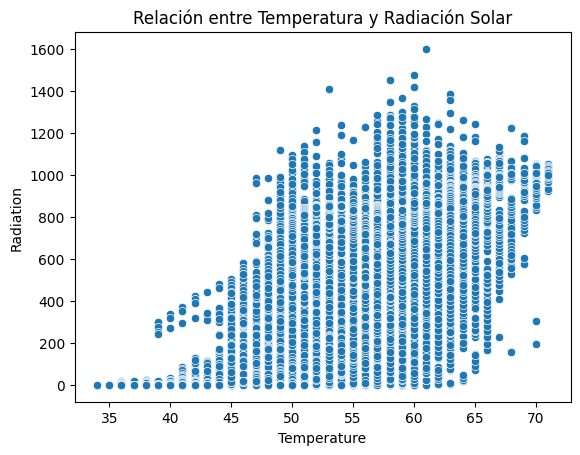

In [14]:
#Diagrama de dispersión (Bivariado)
#Para visualizar la relación entre dos variables:

import seaborn as sns
import matplotlib.pyplot as plt

# Crear un diagrama de dispersión entre 'Radiation' y 'Temperature'
sns.scatterplot(x='Temperature', y='Radiation', data=datos)
plt.title('Relación entre Temperatura y Radiación Solar')
plt.show()

In [15]:
#Correlación bivariada
#Puedes calcular la correlación entre dos variables para ver cómo están relacionadas.

# Calcular la correlación entre dos variables
correlacion_temp_rad = datos['Temperature'].corr(datos['Radiation'])
print("Correlación entre Temperatura y Radiación:", correlacion_temp_rad)

Correlación entre Temperatura y Radiación: 0.7349547554357311


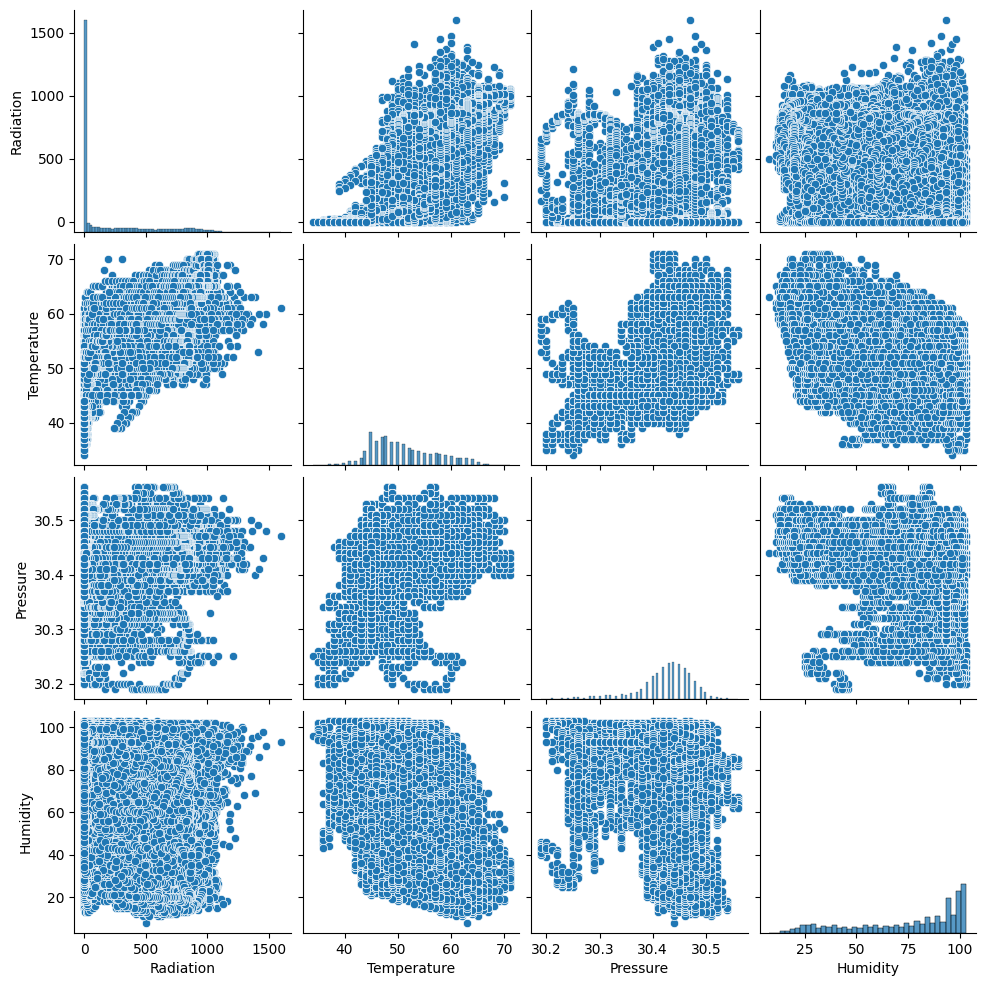

In [16]:
# Crear diagramas de dispersión múltiples
sns.pairplot(datos[['Radiation', 'Temperature', 'Pressure', 'Humidity']])
plt.show()

             Radiation  Temperature  Pressure  Humidity
Radiation     1.000000     0.734955  0.119016 -0.226171
Temperature   0.734955     1.000000  0.311173 -0.285055
Pressure      0.119016     0.311173  1.000000 -0.223973
Humidity     -0.226171    -0.285055 -0.223973  1.000000


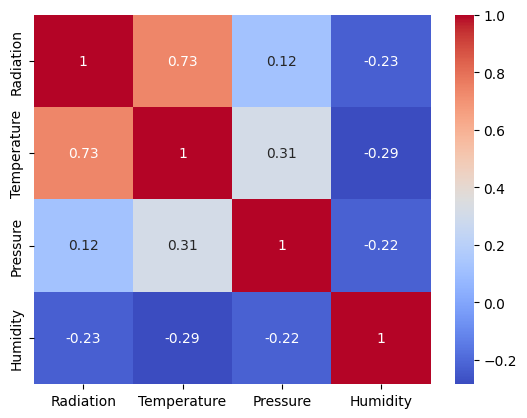

In [17]:
# Calcular la matriz de correlación
correlacion = datos[['Radiation', 'Temperature', 'Pressure', 'Humidity']].corr()
print(correlacion)

# Visualizar la matriz de correlación con un heatmap
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.show()

#Interpretación

1. ivariado: Al observar los diagramas de dispersión entre dos variables (por ejemplo, temperatura y radiación), podrás ver si hay una relación lineal directa o inversa. El valor de correlación (corr) te dirá la fuerza de esa relación: 1 indica una correlación perfecta positiva, -1 una perfecta negativa, y valores cercanos a 0 indican poca o ninguna relación.

2. Multivariado: El análisis multivariado muestra cómo interactúan varias variables entre sí. Por ejemplo, si ves que la radiación aumenta con el aumento de la temperatura pero disminuye con la presión, esto te da una idea de las dependencias entre múltiples factores.